## Exercise 


For this exercise, you will be working with the [House Price Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code).

Please grab the train.csv file from Kaggle and explore this dataset. You need to perform explroatory data analysis and see if there is any correlation between the variables and analyze the distribution of the dataset. The question is open-ended and basically you're asked to perform EDA. 


1- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 3 of your assignment, you need to submit at least one jupyter notebook file and one pdf file.


2- Push your code and project to github and provide the link to your code here. Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510





# Hypothesis
 - ## what are the top 5 categorical variables that mostly affect house price?
 - ## what are the top 5 numericial variables that mostly affect house price?

## 1. import packages

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
#pd.set_option('display.max_rows', 100)

## 2. load dataset

In [2]:
df=pd.read_csv("train_house_price.csv")

## 3. screen data

 - ### **3.1 rows and columns**

In [3]:
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- ### **3.2 overview of dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- ### **3.3 check missing value**
 
    Variable "LotFrontage","Alley","FireplaceQu","PoolQC","Fence", and "MiscFeature" have many missing values(larger than 5%), they can be considered to remove during EDA. rest of variables that have missing value may be pairwise deleted for further analysis

In [5]:
# check missing value
df.isnull().sum()[df.isnull().sum()>0]*100/len(df)

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [6]:
## del variables that have large amount of missing value
print(df.shape)
df=df.drop(["LotFrontage","Alley","FireplaceQu","PoolQC","Fence","MiscFeature"],axis=1)
print(df.shape)

(1460, 81)
(1460, 75)


 - ### **3.4 sort out categorical variables and numercial variables**

In [7]:
# categorical variables
cat_col=df.select_dtypes(include=['object']).columns.tolist()
len(cat_col)

38

In [8]:
# numercial variables
num_col=df.select_dtypes(exclude=['object']).columns.tolist()
len(num_col)

37

- ### **3.5 check the distrubution of salesprice**

Text(0.5, 1.0, "Histogram Plot of df['SalePrice]")

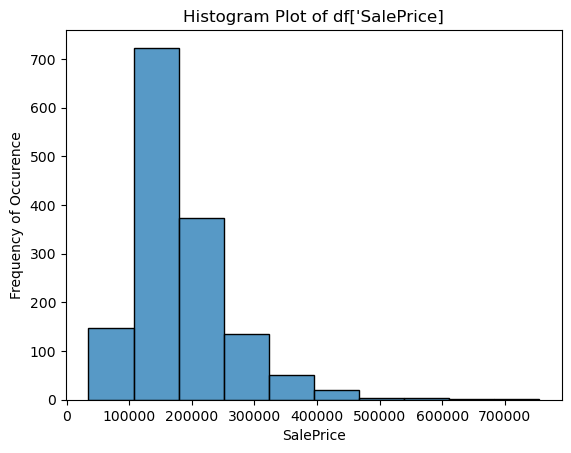

In [72]:
# To remove the curve and increase the bin size to get more detailed histogram
sns.histplot(df['SalePrice'], bins = 10)
plt.ylabel("Frequency of Occurence")
plt.title("Histogram Plot of df['SalePrice]")

## 4. correlation between categorical variables and SalePrice

In [9]:
# create dataframe for categorical variables and saleprice 
df1=df[cat_col]
df2=df['SalePrice']

In [10]:
# merge two dataframes
df3=pd.concat([df1, df2], axis=1, join="inner")

In [11]:
# total columns of new dataframe
len(df3.columns[:-1])

38

In [73]:
# find the correlation between categoricals variable and salesprice, 
# by using statistical test(one-way ANOVA), list top5 variables have more difference of mean between groups in each variable,
# which is corresponding to salesprice

list_df4=[]
for col in df3.columns[:-1]:
    dict_df4={}
    df4=df3[[col,'SalePrice']].dropna() # pairwise detele
    f_val, p_val = stats.f_oneway(*[df4[df4[col] == val]['SalePrice'] for val in df4[col].unique()])
    #print(f"Category {col}: F-value = {f_val:.2f}, p-value = {p_val:.2f}")
    v_mark='False'
    if p_val<0.05: # check if it is statistically significant
        v_mark='True'
    #print(col,f_val,p_val,v_mark)
    dict_df4['cat_name']=col
    dict_df4['f_val']=f_val
    dict_df4['p_val']=p_val
    dict_df4['is_statistically_significant']=v_mark
    #print(dict_df4)
    list_df4.append(dict_df4)
dataframe_df4 = pd.DataFrame(list_df4)
df5=dataframe_df4[dataframe_df4['is_statistically_significant']=="True"]
df5_sorted = df5.copy()
df5_sorted.sort_values(by='f_val', ascending=False, inplace=True)
df5_sorted.head() 

,cat_name,f_val,p_val,is_statistically_significant
17,ExterQual,443.334831,1.439551e-204,True
29,KitchenQual,407.806352,3.032213e-192,True
20,BsmtQual,392.913506,9.610615e-186,True
32,GarageFinish,250.962467,1.199117e-93,True
16,MasVnrType,111.672380,4.793331e-65,True


- ### **4.1 plot top5 categorical variables affect sales price**

<AxesSubplot:xlabel='cat_name', ylabel='f_val'>

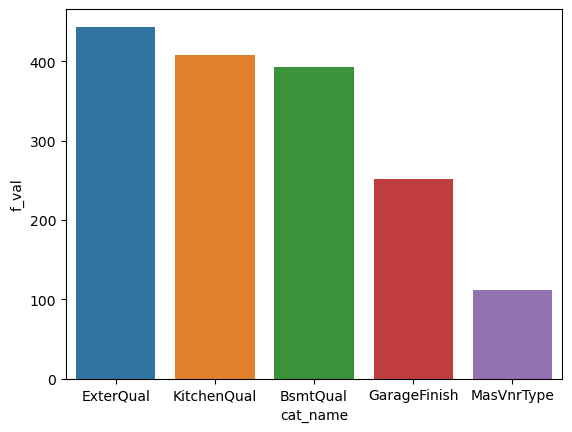

In [102]:
df6=df5_sorted.iloc[0:5]
sns.barplot(x = "cat_name", y = "f_val", data = df6)

- ### **4.2 use bloxplot for each categorical variable affect sales price**

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

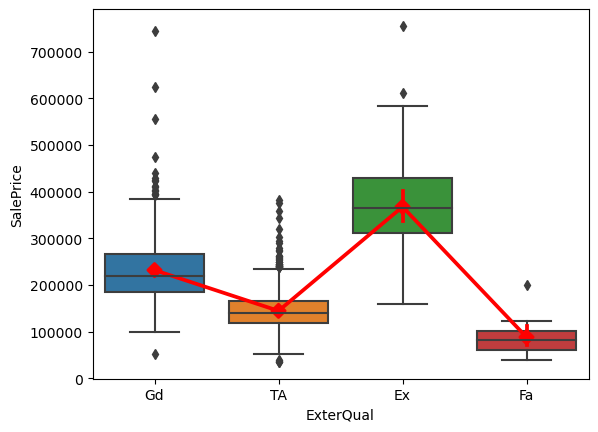

In [104]:
# Exterior material quality and salesprice,Ex	Excellent,Gd	Good,TA	Typical/Average,Fa	Fair,Po	Poor
sns.boxplot(x="ExterQual", y="SalePrice", data=df)
sns.pointplot(x="ExterQual", y="SalePrice", data=df, color='red', markers='D',dodge=True)

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

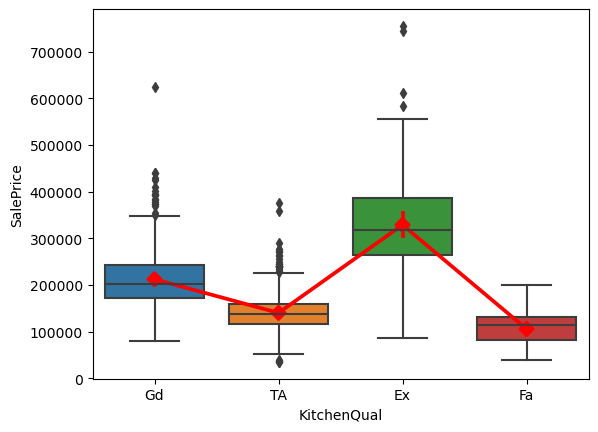

In [82]:
# Kitchen quality and saleprice,Ex	Excellent,Gd	Good,TA	Typical/Average,Fa	Fair,Po	Poor
sns.boxplot(x="KitchenQual", y="SalePrice", data=df)
sns.pointplot(x="KitchenQual", y="SalePrice", data=df, color='red', markers='D',dodge=True)

<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

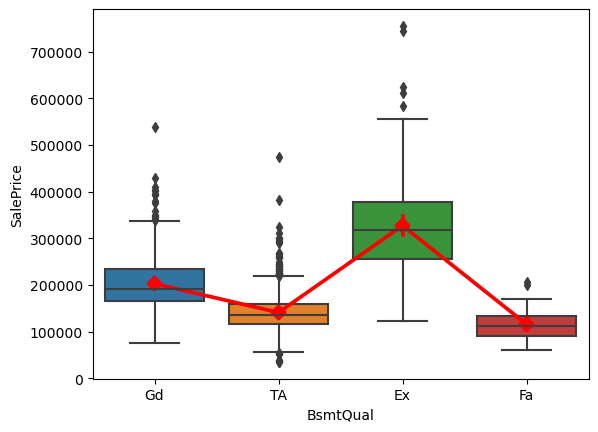

In [83]:
# Evaluates the height of the basement
# Ex	Excellent (100+ inches),Gd	Good (90-99 inches),TA	Typical (80-89 inches),Fa	Fair (70-79 inches),Po	Poor (<70 inches
sns.boxplot(x="BsmtQual", y="SalePrice", data=df)
sns.pointplot(x="BsmtQual", y="SalePrice", data=df, color='red', markers='D',dodge=True)

<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

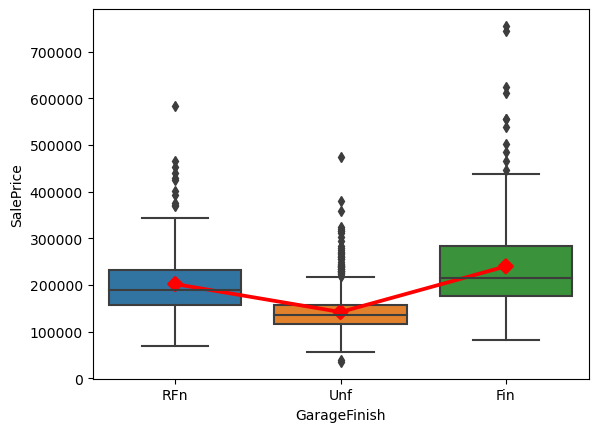

In [84]:
# Interior finish of the garage and salesprice,Fin	Finished,RFn	Rough Finished,Unf	Unfinished,NA	No Garage
sns.boxplot(x="GarageFinish", y="SalePrice", data=df)
sns.pointplot(x="GarageFinish", y="SalePrice", data=df, color='red', markers='D',dodge=True)

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

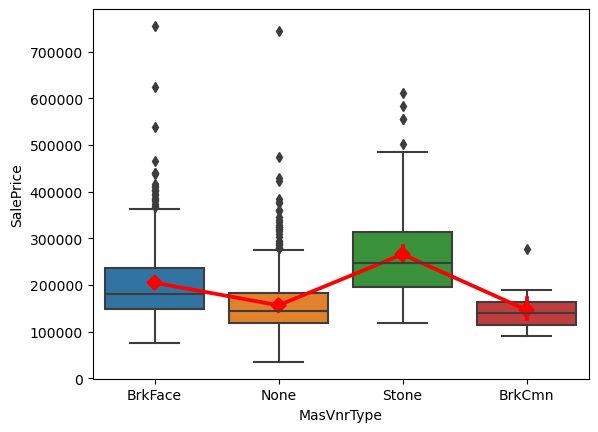

In [85]:
# Masonry veneer type and salesprice,BrkCmn	Brick Common,BrkFace	Brick Face,CBlock	Cinder Block,None	None,Stone	Stone
sns.boxplot(x="MasVnrType", y="SalePrice", data=df)
sns.pointplot(x="MasVnrType", y="SalePrice", data=df, color='red', markers='D',dodge=True)

## 5. correlation between numercial variabels and saleprice

In [70]:
# identify top5 numercial variables have strong correlation with salsprice
df_high_corr=df.corr().loc['SalePrice']
df_high_corr_50=df_high_corr[df_high_corr>0.5]
df_high_corr_50.sort_values(ascending=False)[1:6] 

OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64

- ### **5.1 heatmap**

<AxesSubplot:>

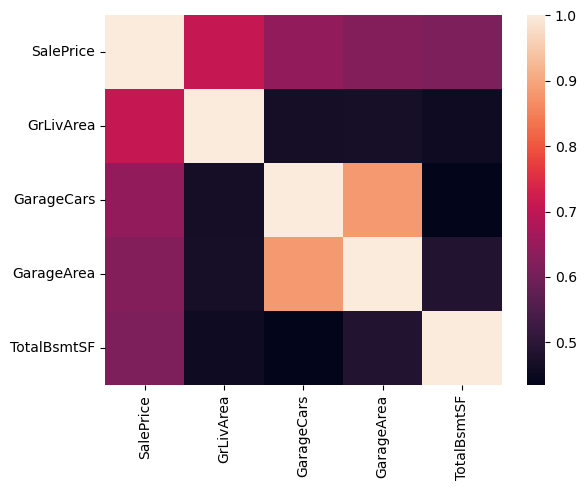

In [97]:
sns.heatmap(df[['SalePrice','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']].corr())

- ### **5.2 jointplot for each numercial variable affect the sales price

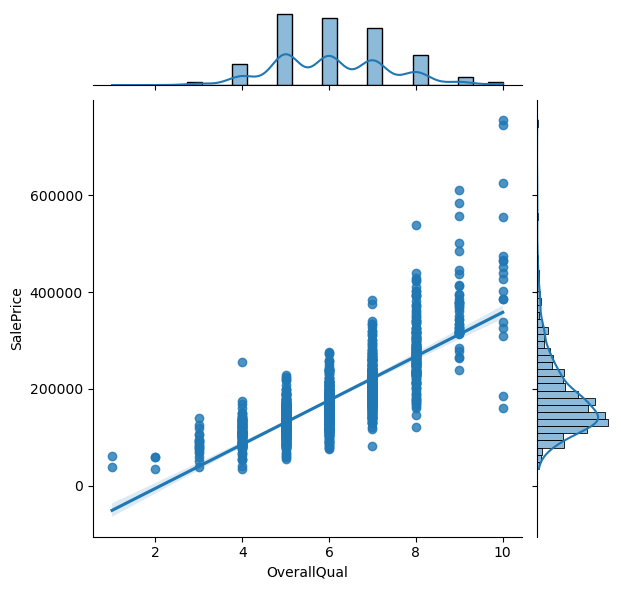

In [86]:
# OverallQual:Rates the overall material and finish of the house
sns.jointplot(x = df['OverallQual'], y = df['SalePrice'], kind = 'reg')

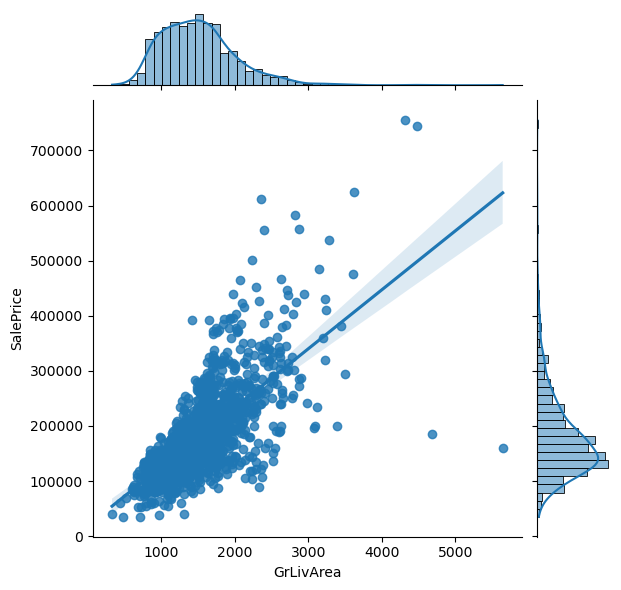

In [87]:
#GrLivArea: Above grade (ground) living area square feet
sns.jointplot(x = df['GrLivArea'], y = df['SalePrice'], kind = 'reg')

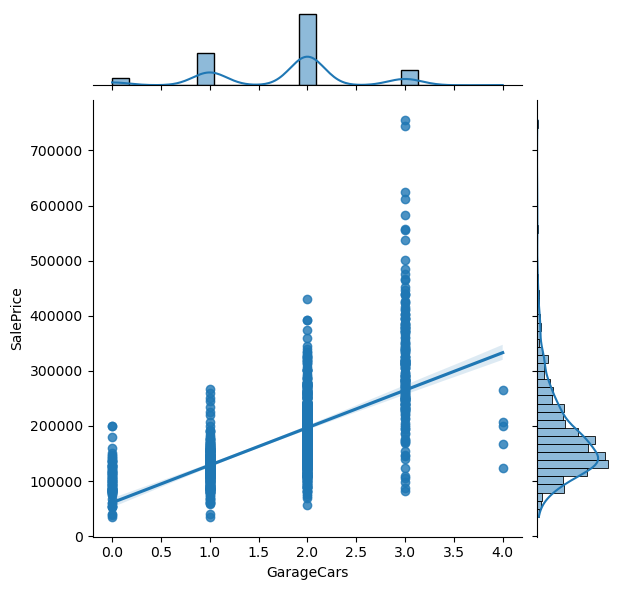

In [90]:
#Size of garage in car capacity
sns.jointplot(x = df['GarageCars'], y = df['SalePrice'], kind = 'reg')

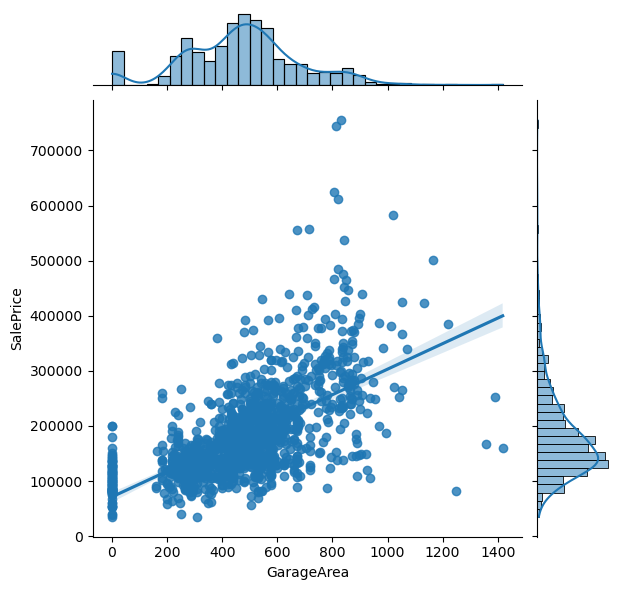

In [88]:
#GarageArea: Size of garage in square feet
sns.jointplot(x = df['GarageArea'], y = df['SalePrice'], kind = 'reg')

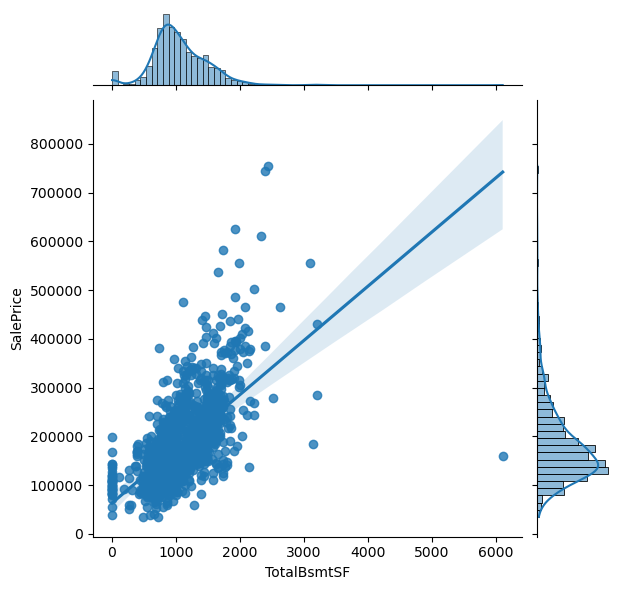

In [89]:
#Total square feet of basement area
sns.jointplot(x = df['TotalBsmtSF'], y = df['SalePrice'], kind = 'reg')